In [1]:
# use geo_env environment
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We query the following CryoTEMPO datasets:

## ESA CryoSat-2, L3, CryoTEMPO, EOLIS Gridded Product, Baseline 2
- 2km resolution
- Spatial slicing does not seem to work.
- Data set represent one time slice each.
- only avialble for the margins (shelves), not the interior. Includes parts of Byrd.
- We process 2011-01 (Earliest January available) and 2025-01 (latest January available). 
- References: 
    - “EOLIS elevation data generated using swath processing of CryoSat-2 data (Jakob & Gourmelen, 2023) and provided by the ESA CryoTEMPO project (https://cryotempo-eolis.org/).”
    - Data over ice sheets – “EOLIS elevation data generated using swath processing of CryoSat-2 data (Gourmelen et al., 2018) and provided by the ESA CryoTEMPO project (https://cryotempo-eolis.org/).”

## Data

ANTARCTICPER is only the periphery so not what we need. We use ANTARCTIC.

In [ ]:
eolis_2011_01 = xr.open_dataset("data/eolis/CS_OFFL_THEM_GRID__ANTARCTIC_2011_01_V201.nc")
eolis_2025_01 = xr.open_dataset("data/eolis/CS_OFFL_THEM_GRID__ANTARCTIC_2025_01_V201.nc")

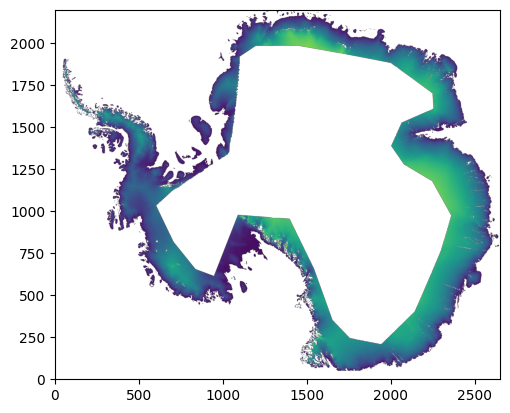

In [ ]:
eolis_2011_01.elevation.values

# NOTE: Have to transpose and origin lower
# Transpose because it is (x, y) order
plt.imshow(eolis_2011_01.elevation.values.squeeze().T, cmap = 'viridis', origin = 'lower')

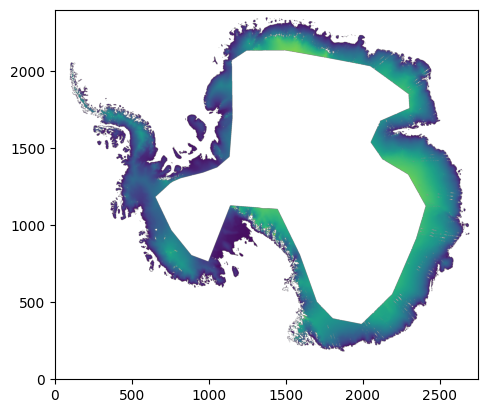

In [ ]:
plt.imshow(eolis_2025_01.elevation.values.squeeze().T, cmap = 'viridis', origin = 'lower')

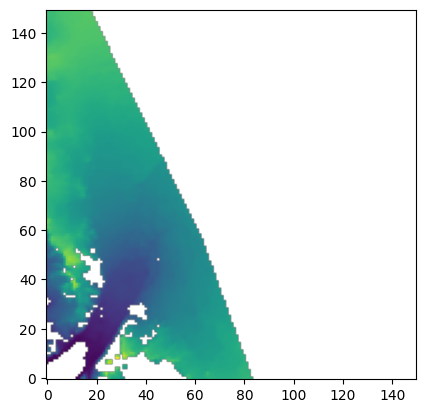

In [ ]:
byrd_2011_01 = eolis_2011_01.sel(
    x = slice(350_000, 650_000),
    y = slice(-1_000_000, -700_000) # both are increasing
)

byrd_2025_01 = eolis_2025_01.sel(
    x = slice(350_000, 650_000),
    y = slice(-1_000_000, -700_000) # both are increasing
)

byrd_t_2011_01 = byrd_2011_01.elevation.values.squeeze().T
byrd_t_2025_01 = byrd_2025_01.elevation.values.squeeze().T

plt.imshow(byrd_t_2011_01, cmap = 'viridis', origin = 'lower')

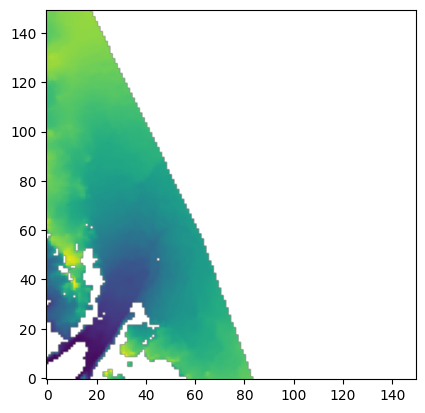

In [ ]:
plt.imshow(byrd_t_2025_01, cmap = 'viridis', origin = 'lower')

In [ ]:
eolis_byrd_t_difference = byrd_t_2025_01 - byrd_t_2011_01

np.nanmax(eolis_byrd_t_difference).item()
np.nanmin(eolis_byrd_t_difference).item()
np.nanmean(eolis_byrd_t_difference).item()/(2025 - 2011)
# 1 cm per year

-0.009534850716590881

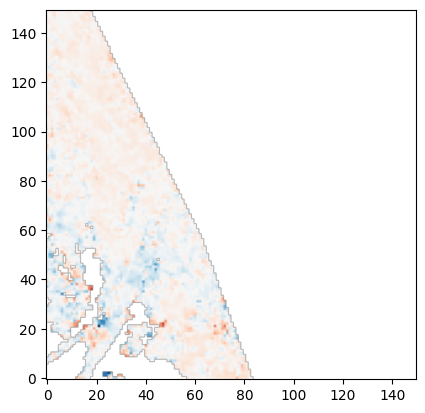

In [ ]:
plt.imshow(eolis_byrd_t_difference, cmap = 'RdBu', origin = 'lower', vmax= 10, vmin = -10)

# Land ice (not used currently)

## ESA CryoSat-2, L3, CryoTEMPO, Land Ice Thematic Product, Baseline C
- Apparently "5 km resolution" - but no gridded data visible
- available for the full continent
- "Temporal subsetting disabled"
- [Info on file naming](https://www.cpom.ucl.ac.uk/cryotempo/product_downloads.php)
- In the download history this is called "TEMPO_POCA_LI_C" 
    - POCA: Point of Closest Approach, see [algo documentation](https://earth.esa.int/eogateway/documents/20142/37627/Cryo-TEMPO-ATBD-Document-Land-Ice.pdf)
    - [data folder on server](https://science-pds.cryosat.esa.int/#Cry0Sat2_data%2FTEMPO_POCA_LI%2F2024%2F01%2FANTARC)
- Issue: File seems corrupted: No coordinates. 
- [Variable overview](https://www.cpom.ucl.ac.uk/cryotempo/index.php?hillshade=0&baseline=D&version=001&theme=landice&area=antarctica_all&month=3&year=2025&parameter=elevation)
- Over 2000 files. Does not appear to be gridded currently.

In [ ]:
# try to download examplary file
# land_ice = xr.open_dataset("data/eolis/land_ice/CS_OFFL_SIR_TDP_LI_ANTARC_20101218T074854_20101218T075135_02_05295_C001.nc")

# Issue with file
land_ice = xr.open_dataset("data/eolis/land_ice/CS_OFFL_SIR_TDP_LI_ANTARC_20101218T074854_20101218T075135_02_05295_C001.nc", decode_times = False)

land_ice

<xarray.Dataset> Size: 247kB
Dimensions:          (time: 3429)
Coordinates:
  * time             (time) float64 27kB 3.46e+08 3.46e+08 ... 3.46e+08 3.46e+08
    latitude         (time) float64 27kB ...
    longitude        (time) float64 27kB ...
Data variables:
    instrument_mode  (time) float32 14kB ...
    elevation        (time) float64 27kB ...
    backscatter      (time) float64 27kB ...
    surface_type     (time) float32 14kB ...
    reference_dem    (time) float64 27kB ...
    basin_id         (time) float32 14kB ...
    basin_id2        (time) float32 14kB ...
    uncertainty      (time) float64 27kB ...
Attributes: (12/30)
    title:                    Cryo-TEMPO Land Ice Thematic Product
    project:                  ESA Cryo-TEMPO
    creator_name:             ESA Cryo-TEMPO Project
    creator_url:              http://cryosat.mssl.ucl.ac.uk/tempo
    date_created:             24-02-2024 23:14:44
    platform:                 CryoSat-2
    ...                       ...
    doi:                      10.5270/CR2-3205d1e
    sw_version:               9286ea1fff1737a5a9064a8a1d166b03d68e18b7
    cnes_subcycle:            20
    cnes_track:               23
    Conventions:              CF-1.8
    zone:                     Antarctica

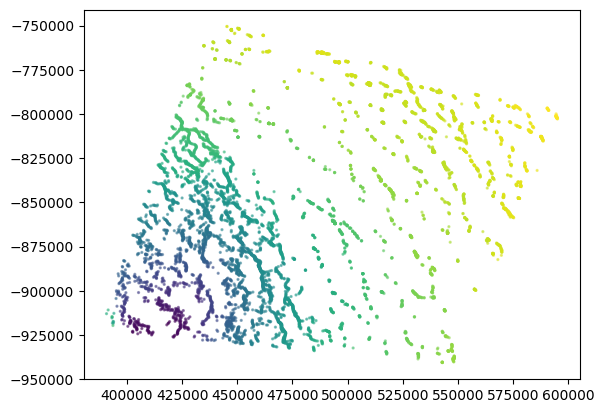

In [34]:
plt.scatter(
    land_ice_2011.longitude.values, 
    land_ice_2011.latitude.values, 
    c = land_ice_2011.elevation.values, 
    cmap = 'viridis', 
    s = 1.8, 
    alpha = 0.5
)

In [29]:
land_ice_2011 = xr.open_dataset(
    "/home/kim/ice_thickness/data/eolis/land_ice/20101211T183923_20110111T171217_lon_+387847260_+595119820_lat_-941153350_-750535580.nc")

land_ice_2011
print(land_ice_2011.latitude.values.min())
print(land_ice_2011.latitude.values.max())
print(land_ice_2011.longitude.values.max())
print(land_ice_2011.longitude.values.min())

-941153.3458503669
-750535.5793590931
595119.8225390218
387847.2614324967
